# EARLY DETECTION OF ALZHEIMER'S DISEASE

## Business Understanding

The AlzAware project seeks to create a predictive model for the early detection of Alzheimer’s Disease (AD) and Alzheimer’s Disease-Related Dementias (AD/ADRD) using social determinants of health. By analyzing data from the Mexican Health and Aging Study (MHAS), the project aims to identify links between social, economic, and environmental factors and the risk of cognitive decline. The goal is to support early intervention and improve access to care, particularly for underserved populations.

Key Goals and Outcomes

- Improved Early Detection: Identify individuals at risk of AD/ADRD using non-clinical factors to enable timely intervention.

- Bias Mitigation: Ensure accurate predictions across diverse demographic groups, minimizing disparities.

- Enhanced Accessibility: Develop a model that can be broadly applied, using commonly available social health data.

- Potential for Generalization: Provide a framework adaptable for AD/ADRD prediction in other populations and regions.







## Data Understanding

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load datasets using raw string notation
submission_format = pd.read_csv(r'C:\Users\FEMI\Documents\NEW CAPSTONE PROJECT\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\submission_format.csv')
test_features = pd.read_csv(r'C:\Users\FEMI\Documents\NEW CAPSTONE PROJECT\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\test_features.csv')
train_features = pd.read_csv(r'C:\Users\FEMI\Documents\NEW CAPSTONE PROJECT\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\train_features.csv')
train_labels = pd.read_csv(r'C:\Users\FEMI\Documents\NEW CAPSTONE PROJECT\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\train_labels.csv')

# Display first few rows of each dataset
print("Submission Format:\n", submission_format.head(), "\n")
print("Test Features:\n", test_features.head(), "\n")
print("Train Features:\n", train_features.head(), "\n")
print("Train Labels:\n", train_labels.head())

Submission Format:
     uid  year  composite_score
0  abxu  2016                0
1  aeol  2016                0
2  aeol  2021                0
3  afnb  2016                0
4  afnb  2021                0 

Test Features:
     uid    age_03     urban_03                    married_03  n_mar_03  \
0  abxu       NaN          NaN                           NaN       NaN   
1  aeol       NaN          NaN                           NaN       NaN   
2  afnb       NaN          NaN                           NaN       NaN   
3  ajfh       NaN          NaN                           NaN       NaN   
4  ajvq  2. 60–69  1. 100,000+  1. Married or in civil union       1.0   

     edu_gru_03 n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  \
0           NaN               NaN           NaN          NaN           NaN   
1           NaN               NaN           NaN          NaN           NaN   
2           NaN               NaN           NaN          NaN           NaN   
3           NaN    

Overview of Data Structure

##### Data types and dimensions

In [7]:
print("Train Features:", train_features.shape)
print("Test features:",test_features.shape)

Train Features: (3276, 184)
Test features: (819, 184)


Checking for missing values across the datasets

In [8]:
print("Missing Values:\n", train_features.isnull().sum())

Missing Values:
 uid              0
age_03        1036
urban_03      1034
married_03    1034
n_mar_03      1054
              ... 
a21_12        3234
a22_12        3240
a33b_12       3234
a34_12        1164
j11_12          75
Length: 184, dtype: int64


In [9]:
print("Summary Statistics:", train_features.describe())

Summary Statistics:           n_mar_03  migration_03  adl_dress_03  adl_walk_03  adl_bath_03  \
count  2222.000000   2241.000000   2105.000000  2235.000000  2235.000000   
mean      1.134113      0.099063      0.041805     0.017002     0.007159   
std       0.482953      0.298813      0.200191     0.129308     0.084325   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       1.000000      0.000000      0.000000     0.000000     0.000000   
50%       1.000000      0.000000      0.000000     0.000000     0.000000   
75%       1.000000      0.000000      0.000000     0.000000     0.000000   
max       5.000000      1.000000      1.000000     1.000000     1.000000   

        adl_eat_03   adl_bed_03  adl_toilet_03     n_adl_03  iadl_money_03  \
count  2234.000000  2235.000000    2235.000000  2234.000000    2105.000000   
mean      0.004476     0.026398       0.013423     0.068487       0.005226   
std       0.066770     0.160352       0.115102     0.392793  

In [10]:
merged_train_features = pd.merge(train_features, train_labels, on='uid', how="left")
merged_train_features.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
3,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


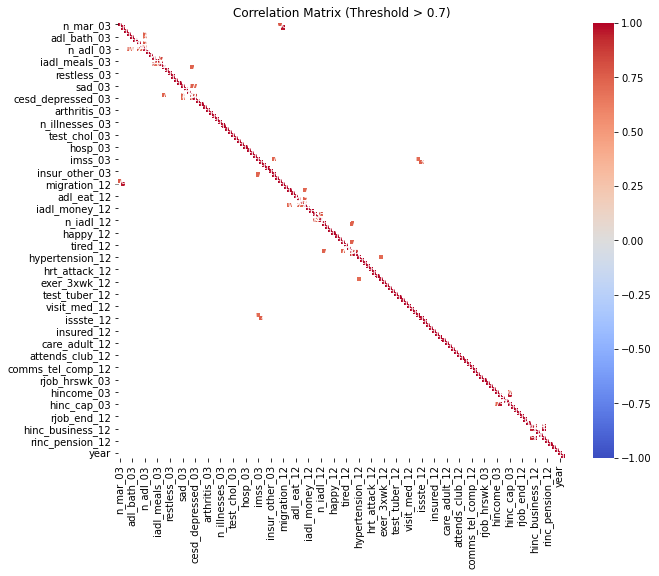

In [11]:

# Calculate the correlation matrix
corr_matrix = merged_train_features.corr().abs()  # Take absolute values for simplicity in thresholding

# Set a correlation threshold
threshold = 0.7  # Adjust this value based on how strict you want the filtering

# Filter the correlation matrix
high_corr = corr_matrix[corr_matrix >= threshold]
high_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')  # Drop rows and columns that are all NaN

# Plot the filtered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Matrix (Threshold > {threshold})')
plt.show()


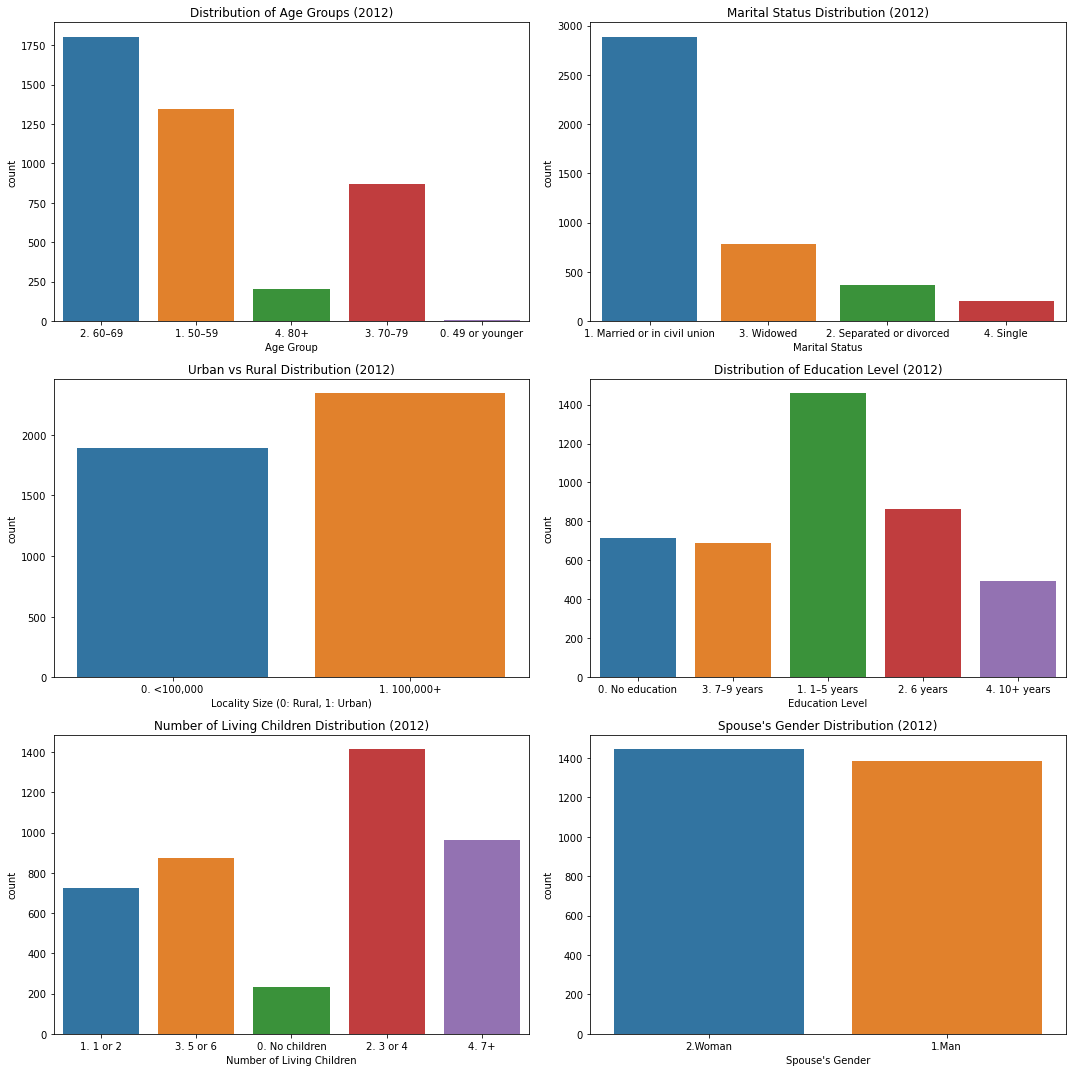

In [12]:
# Plotting demographic variables
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Binned Age Group Distribution
sns.countplot(data=merged_train_features, x='age_12', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups (2012)')
axes[0, 0].set_xlabel('Age Group')

# Marital Status Distribution
sns.countplot(data=merged_train_features, x='married_12', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution (2012)')
axes[0, 1].set_xlabel('Marital Status')

# Urban vs Rural Distribution
sns.countplot(data=merged_train_features, x='urban_12', ax=axes[1, 0])
axes[1, 0].set_title('Urban vs Rural Distribution (2012)')
axes[1, 0].set_xlabel('Locality Size (0: Rural, 1: Urban)')

# Binned Education Level Distribution
sns.countplot(data=merged_train_features, x='edu_gru_12', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Education Level (2012)')
axes[1, 1].set_xlabel('Education Level')

# Number of Living Children Distribution
sns.countplot(data=merged_train_features, x='n_living_child_12', ax=axes[2, 0])
axes[2, 0].set_title('Number of Living Children Distribution (2012)')
axes[2, 0].set_xlabel('Number of Living Children')

# Spouse's Gender Distribution
sns.countplot(data=merged_train_features, x='sgender_12', ax=axes[2, 1])
axes[2, 1].set_title("Spouse's Gender Distribution (2012)")
axes[2, 1].set_xlabel("Spouse's Gender")

plt.tight_layout()
plt.show()



Distribution on Health and Lifestyle:

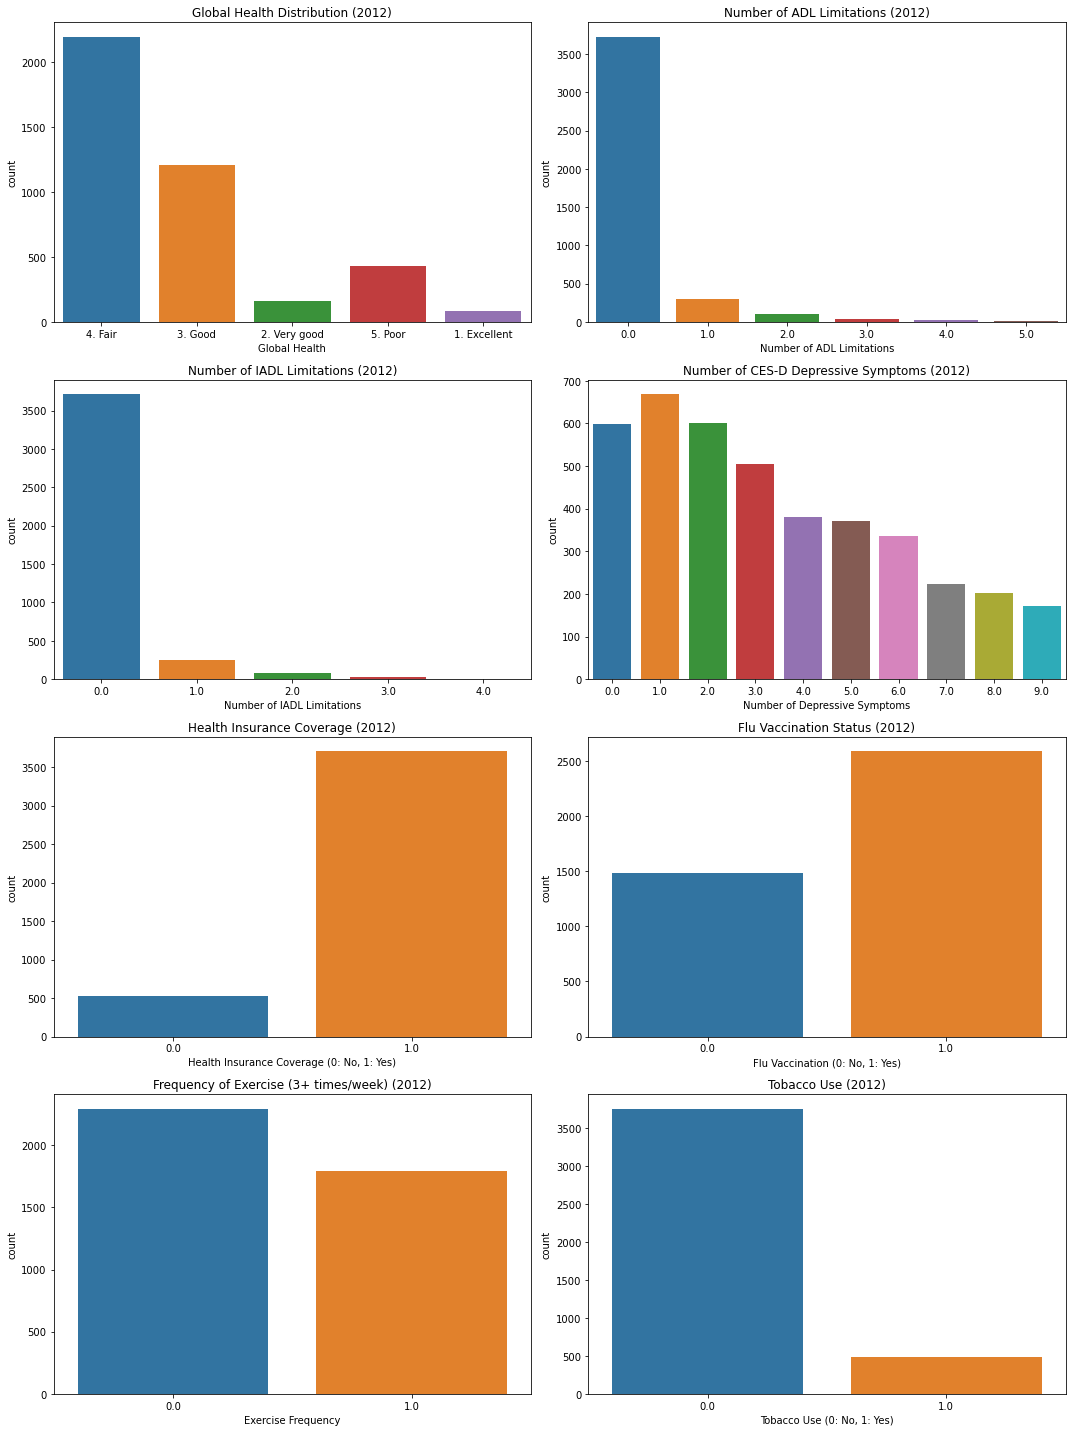

In [13]:
# Plotting health and lifestyle variables
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Global Health Distribution
sns.countplot(data=merged_train_features, x='glob_hlth_12', ax=axes[0, 0])
axes[0, 0].set_title('Global Health Distribution (2012)')
axes[0, 0].set_xlabel('Global Health')

# Activities of Daily Living (ADL) Limitations
sns.countplot(data=merged_train_features, x='n_adl_12', ax=axes[0, 1])
axes[0, 1].set_title('Number of ADL Limitations (2012)')
axes[0, 1].set_xlabel('Number of ADL Limitations')

# Instrumental Activities of Daily Living (IADL) Limitations
sns.countplot(data=merged_train_features, x='n_iadl_12', ax=axes[1, 0])
axes[1, 0].set_title('Number of IADL Limitations (2012)')
axes[1, 0].set_xlabel('Number of IADL Limitations')

# Depressive Symptoms Distribution
sns.countplot(data=merged_train_features, x='n_depr_12', ax=axes[1, 1])
axes[1, 1].set_title('Number of CES-D Depressive Symptoms (2012)')
axes[1, 1].set_xlabel('Number of Depressive Symptoms')

# Health Coverage Distribution
sns.countplot(data=merged_train_features, x='insured_12', ax=axes[2, 0])
axes[2, 0].set_title('Health Insurance Coverage (2012)')
axes[2, 0].set_xlabel('Health Insurance Coverage (0: No, 1: Yes)')

# Vaccination Status for Flu
sns.countplot(data=merged_train_features, x='vax_flu_12', ax=axes[2, 1])
axes[2, 1].set_title('Flu Vaccination Status (2012)')
axes[2, 1].set_xlabel('Flu Vaccination (0: No, 1: Yes)')

# Exercise Frequency
sns.countplot(data=merged_train_features, x='exer_3xwk_12', ax=axes[3, 0])
axes[3, 0].set_title('Frequency of Exercise (3+ times/week) (2012)')
axes[3, 0].set_xlabel('Exercise Frequency')

# Tobacco Use Distribution
sns.countplot(data=merged_train_features, x='tobacco_12', ax=axes[3, 1])
axes[3, 1].set_title('Tobacco Use (2012)')
axes[3, 1].set_xlabel('Tobacco Use (0: No, 1: Yes)')

plt.tight_layout()
plt.show()


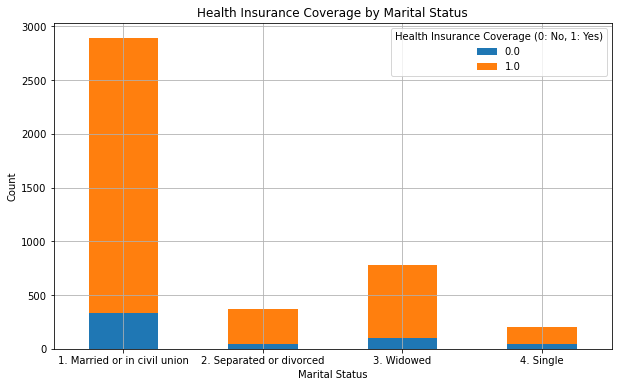

In [14]:
# Stacked bar plot for Marital Status vs. Health Insurance Coverage
marital_health = pd.crosstab(merged_train_features['married_12'], merged_train_features['insured_12'])
marital_health.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Health Insurance Coverage by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Health Insurance Coverage (0: No, 1: Yes)')
plt.grid()
plt.show()

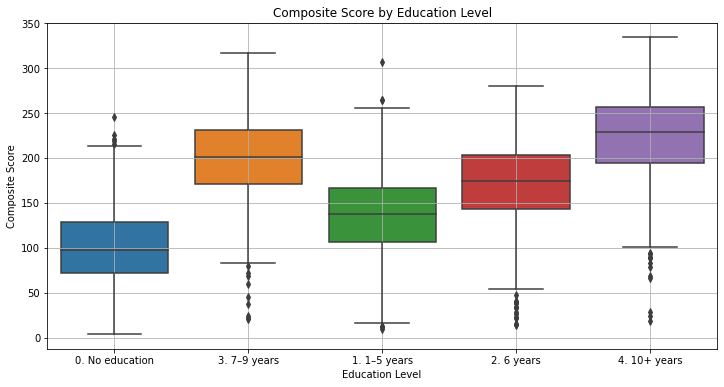

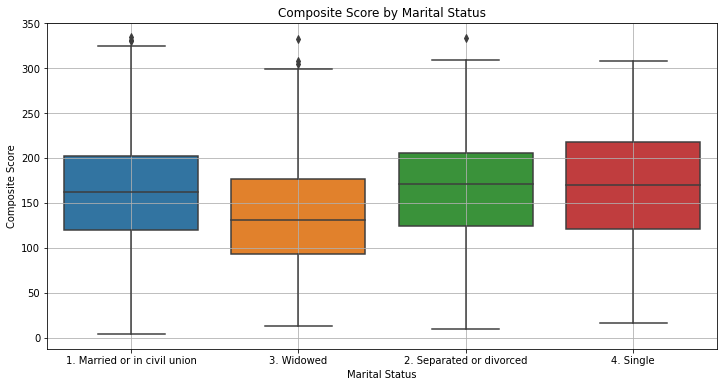

In [15]:
# Boxplot of Composite Score by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_train_features, x='edu_gru_12', y='composite_score')
plt.title('Composite Score by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Composite Score')
plt.grid()
plt.show()

# Boxplot of Composite Score by Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_train_features, x='married_12', y='composite_score')
plt.title('Composite Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Composite Score')
plt.grid()
plt.show()


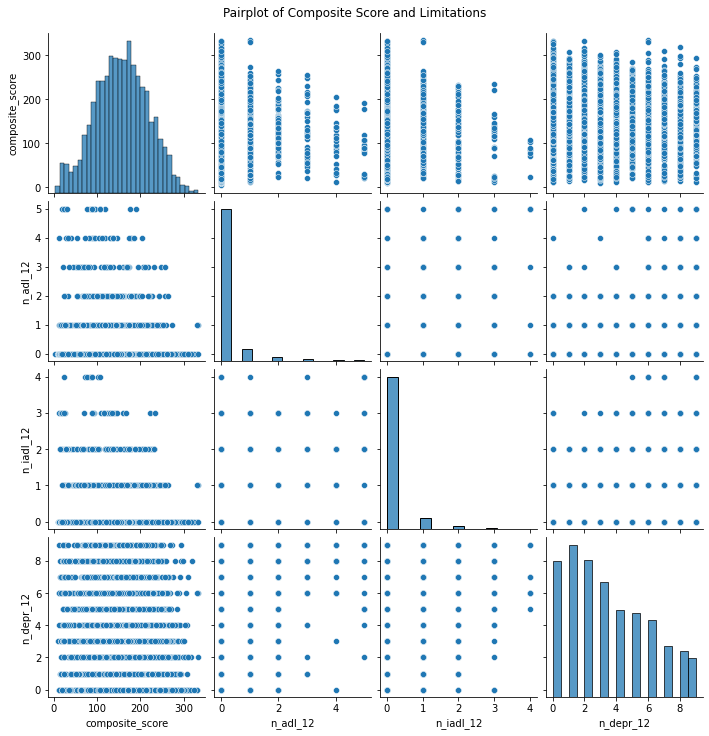

In [16]:
# Pairplot for selected numeric variables
sns.pairplot(merged_train_features[['composite_score', 'n_adl_12', 'n_iadl_12', 'n_depr_12']])
plt.suptitle('Pairplot of Composite Score and Limitations', y=1.02)
plt.show()

In [17]:
merged_train_features.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
3,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


In [20]:
#defining a function for missing values percentages
def clean_missing_data(merged_train_features, threshold=70):
    missing_percentage = merged_train_features.isnull().mean() * 100
    print("Missing Value Percentage:\n", missing_percentage)
    df_cleaned = df.loc[:, missing_percentage <= threshold]
    
    return df_cleaned



## Train-test split

In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'composite_score' is the target variable
X = merged_train_features.drop(columns=['composite_score'])  # Features
y = merged_train_features['composite_score']                 # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 3474 samples
Testing set size: 869 samples


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


ValueError: could not convert string to float: 'pteh'